# Linear Regression Model

In [1]:
# Installations
# !pip install keras
# !pip install tensorflow
# !pip install sklearn --upgrade
# !pip install joblib

In [2]:
import warnings
warnings.simplefilter('ignore')

# Load dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the same starting seed number for numpy.random so the results are reproducible
from numpy.random import seed
seed(42)

## Basic Data Cleaning

In [7]:
# Read and clean the data
# primary = os.path.join('..','resources','primary_indicators.csv')
education = os.path.join('..','resources','education_df.csv')
gender = os.path.join('..','resources','gender_df.csv')

# primary_df = pd.read_csv(primary)
education_df = pd.read_csv(education)
gender_df = pd.read_csv(gender)

education_df = education_df.loc[education_df["indicator_name"] == "Education Index"]
gender_df = gender_df.loc[gender_df["indicator_name"] == "Gender Inequality Index"]

# all_dfs = [primary_df, education_df, gender_df]
# df = pd.concat(all_dfs)

secondary_dfs = [education_df, gender_df]
df = pd.concat(secondary_dfs)

df.tail()

,Unnamed: 0,country_name,indicator_name,year,value,hdi
21505,913,Venezuela,Gender Inequality Index,2018,0.458,NaN
21506,914,Viet,Gender Inequality Index,2018,0.314,NaN
21507,915,Yemen,Gender Inequality Index,2018,0.834,0.463
21508,916,Zambia,Gender Inequality Index,2018,0.540,0.591
21509,917,Zimbabwe,Gender Inequality Index,2018,0.525,0.563


In [8]:
filepath = os.path.join('..','static','secondary_pivot.csv')
df.to_csv(filepath, header = True)

In [9]:
# Grab only the rows belonging to the specified indicator
# indicator = "Population, total"
# indicator = "Life expectancy at birth, total (years)"
# indicator = "GDP (current US$)"
# indicator = "Employers, total (% of total employment) (modeled ILO estimate)"
# indicator = "Agriculture, forestry, and fishing, value added (% of GDP)"
# indicator = "Education Index"
indicator = "Gender Inequality Index"

indicator_df = df.loc[df["indicator_name"] == indicator, :]
print(indicator_df.shape)

# Drop the null rows
indicator_df = indicator_df.dropna()
indicator_df = indicator_df.sort_values("value")
print(indicator_df.shape)

indicator_df.head()

(794, 6)
(637, 6)


,Unnamed: 0,country_name,indicator_name,year,value,hdi
21488,896,Switzerland,Gender Inequality Index,2018,0.037,0.946
21487,895,Sweden,Gender Inequality Index,2018,0.040,0.937
21326,707,Switzerland,Gender Inequality Index,2017,0.040,0.943
21391,799,Denmark,Gender Inequality Index,2018,0.040,0.930
21230,610,Denmark,Gender Inequality Index,2017,0.041,0.929


In [10]:
# Flatten the data into arrays
X = np.array(indicator_df["value"])
y = np.array(indicator_df["hdi"].astype('float'))

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

print(X.shape)
print(y.shape)

(637, 1)
(637, 1)


## Plot the Data

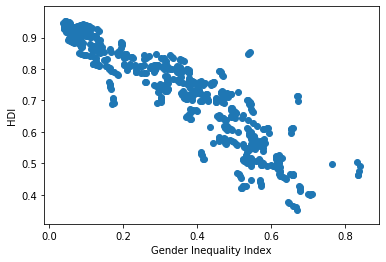

In [11]:
fig, ax = plt.subplots()
ax.scatter(X, y)
plt.xlabel(indicator)
plt.ylabel("HDI")
plt.show()

## Data Preprocessing for ML

In [12]:
# Split into Test and Train data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [13]:
# Scale the data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [14]:
# Transform the training and test data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

## Creating the Model

### Linear Regression Model

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# Create the model using LinearRegression
linear = LinearRegression()

# Train the model
linear.fit(X_train_scaled, y_train_scaled)

# Use our model to make predictions
predictions = linear.predict(X_test_scaled)

# Score the model
# training_score = model.score(X_train_scaled, y_train_scaled)
# testing_score = model.score(X_test_scaled, y_test_scaled)
r2 = linear.score(X_test_scaled, y_test_scaled)
mse = mean_squared_error(y_test_scaled, predictions)

# print(f"Training Score: {training_score}")
# print(f"Testing Score: {testing_score}")
print(f"R2 Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Linear Coefficient: {linear.coef_[0][0]}")
print(f"y-Axis Intercept: {linear.intercept_[0]}")

R2 Score: 0.816192887672184
Mean Squared Error (MSE): 0.23594047353420558
Linear Coefficient: -0.9000781952759357
y-Axis Intercept: 6.043985979981646e-16


### Plot the Model

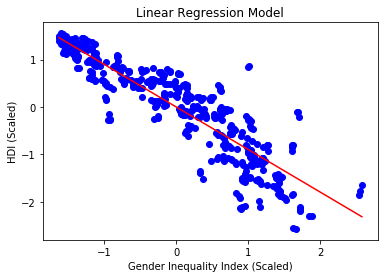

In [17]:
# Plot the model
x_min = np.array([[X_train_scaled.min()]])
x_max = np.array([[X_train_scaled.max()]])
y_min = linear.predict(x_min)
y_max = linear.predict(x_max)
plt.scatter(X_train_scaled, y_train_scaled, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.title("Linear Regression Model")
plt.xlabel(f"{indicator} (Scaled)")
plt.ylabel("HDI (Scaled)")
plt.show()

### Predicting HDI value

In [18]:
feed_value = 0.9
X_scaled = X_scaler.transform([[feed_value]])
y_scaled = linear.predict(X_scaled)
predicted_y = y_scaler.inverse_transform(y_scaled)
predicted_HDI = predicted_y[0][0]
predicted_HDI
print(f"If a country's {indicator} is {feed_value}, we expect HDI to be approximately {predicted_HDI}.")

If a country's Gender Inequality Index is 0.9, we expect HDI to be approximately 0.35799214008424524.


### Plot the Residuals

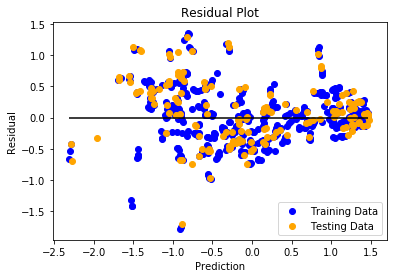

In [19]:
# Plot the residuals
y_train_predict = linear.predict(X_train_scaled)
y_test_predict = linear.predict(X_test_scaled)
y_train_residual = linear.predict(X_train_scaled) - y_train_scaled
y_test_residual = linear.predict(X_test_scaled) - y_test_scaled

plt.scatter(y_train_predict, y_train_residual, c="blue", label="Training Data")
plt.scatter(y_test_predict, y_test_residual, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_train_predict.min(), xmax=y_train_predict.max())
plt.title("Residual Plot")
plt.xlabel("Prediction")
plt.ylabel("Residual")
plt.show()